In [1]:
import numpy as np
import nibabel as nib
import itk
from itkwidgets import view
import glob
import os
import SimpleITK as sitk

def show_data(path):
    print(path)
    img = sitk.ReadImage(path)
    data = sitk.GetArrayFromImage(img)
    print(data.shape)
    data = np.unique(data)
    print(data)
    
series_name = '1036604/65669469'#'1073332/5F653FE9' 6566EAC0
vessel_name = glob.glob(os.path.join('/mnt/DrwiseDataNFS/drwise_runtime_env/data1/inputdata/', series_name.split('/')[0], '*', series_name.split('/')[1]+'_CTA', 'mask_source/mask_vessel.nii.gz'))
vessel_plque_nii = nib.load(vessel_name[0])
origin_vessel_plque_nii = nib.load('/mnt/users/ffr_plaque_mask/'+series_name+'/mask_plaque_centerline.nii.gz')
#new_vessel_plque_nii = nib.load('/mnt/users/ffr_plaque_mask/'+series_name+'/mask_plaque_newwsw.nii.gz')
direct_vessel_plque_nii = nib.load('/mnt/users/ffr_plaque_mask/'+series_name+'/mask_plaque_direct.nii.gz')
show_data('/mnt/users/ffr_plaque_mask/'+series_name+'/mask_plaque_centerline.nii.gz')
#show_data('/mnt/users/ffr_plaque_mask/'+series_name+'/mask_plaque_newmap.nii.gz')
vessel_plque = vessel_plque_nii.get_fdata()
origin_vessel_plque = origin_vessel_plque_nii.get_fdata()
#new_vessel_plque = new_vessel_plque_nii.get_fdata()
direct_vessel_plque = direct_vessel_plque_nii.get_fdata()
pts0 = np.stack(np.where(vessel_plque>0), axis=1)
pts1 = np.stack(np.where(origin_vessel_plque>0), axis=1)
#pts2 = np.stack(np.where(new_vessel_plque>0), axis=1)
pts3 = np.stack(np.where(direct_vessel_plque>0), axis=1)
view(point_sets=[pts0, pts1, pts3])

/mnt/users/.local/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


/mnt/users/ffr_plaque_mask/1036604/65669469/mask_plaque_centerline.nii.gz
(197, 512, 512)
[0. 1.]


Viewer(geometries=[], gradient_opacity=0.22, point_set_colors=array([[0.8392157 , 0.        , 0.        ],
   …

/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/1036604/65669469_CTA/coro001_0.png
/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/1036604/65669469_CTA/coro001_9.png
/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/1036604/65669469_CTA/coro001_18.png
/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/1036604/65669469_CTA/coro001_27.png
/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/1036604/65669469_CTA/coro001_36.png
/mnt/users/ffr_datasets/ffr_newcpr/1036604/65669469_CTA/coro001_0.png
/mnt/users/ffr_datasets/ffr_newcpr/1036604/65669469_CTA/coro001_9.png
/mnt/users/ffr_datasets/ffr_newcpr/1036604/65669469_CTA/coro001_18.png
/mnt/users/ffr_datasets/ffr_newcpr/1036604/65669469_CTA/coro001_27.png
/mnt/users/ffr_datasets/ffr_newcpr/1036604/65669469_CTA/coro001_36.png


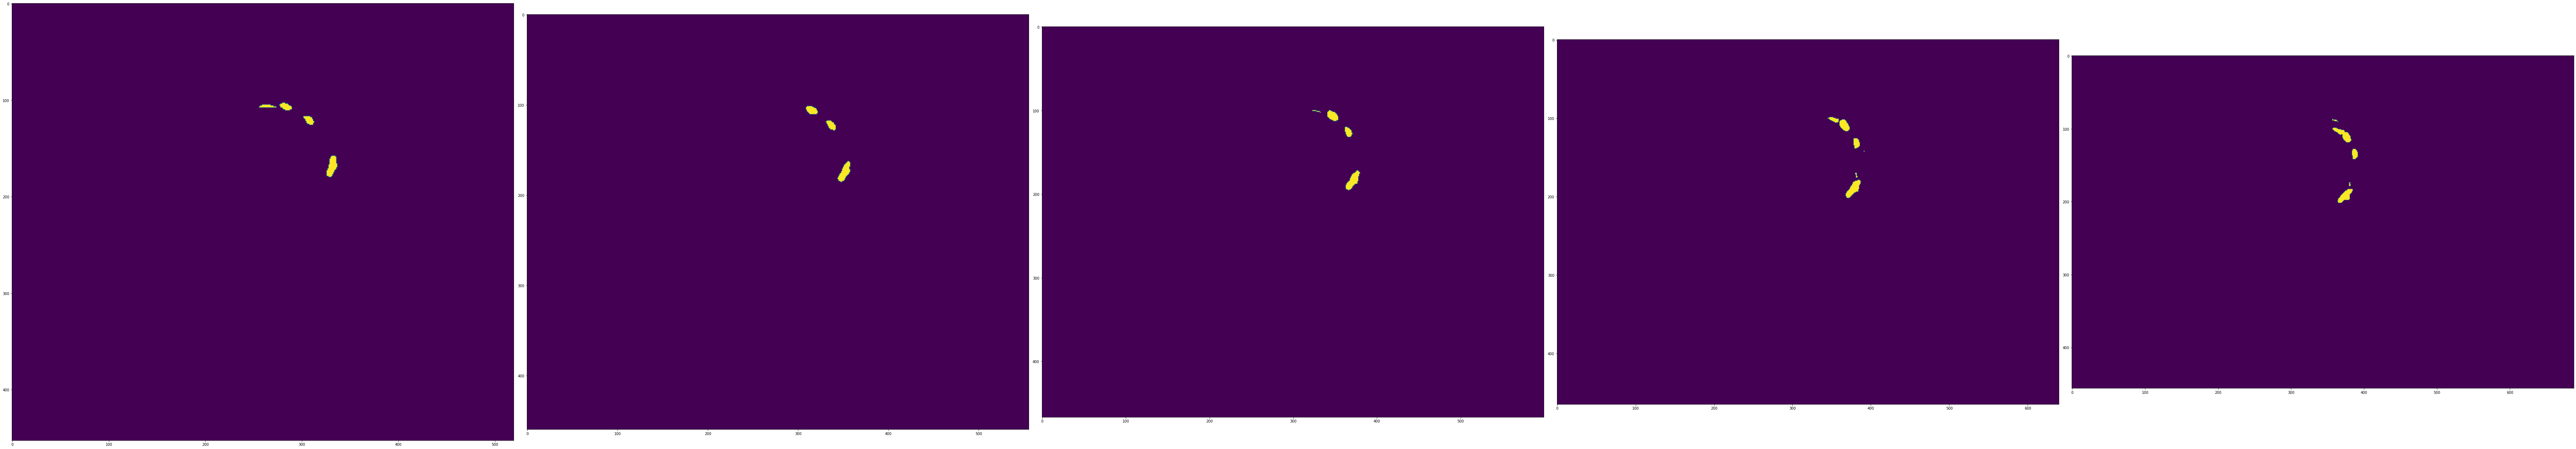

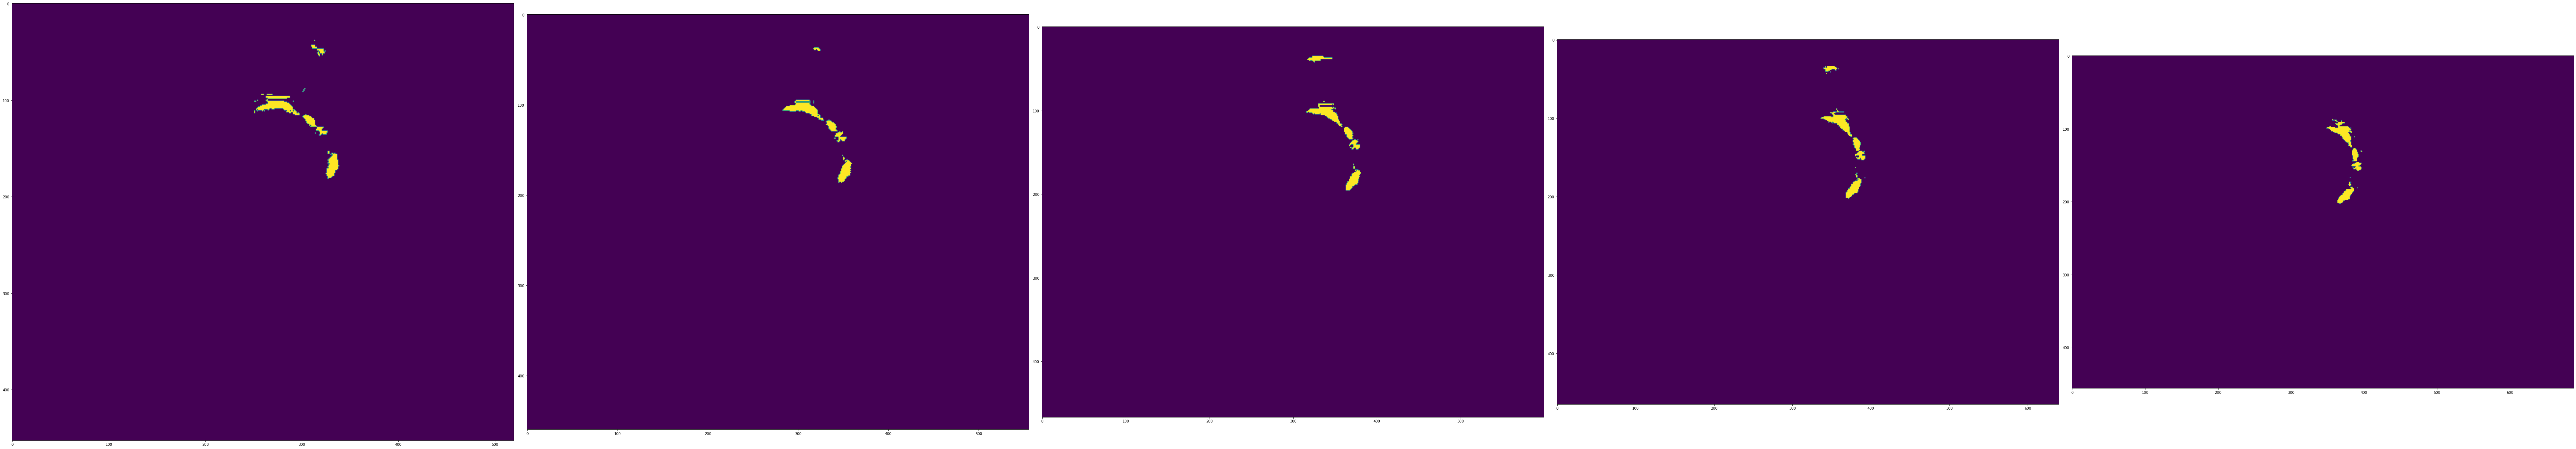

In [47]:
import matplotlib.pyplot as plt
#%matplotlib inline
from PIL import Image
import numpy as np
import cv2 
import torch
import re 

name = '1036604/65669469_CTA'
origin_cpr_path = '/mnt/users/ffr_datasets/ffr_cpr_mask_dealt/'+name
new_cpr_path = '/mnt/users/ffr_datasets/ffr_newcpr/'+name

_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(_nsre, s)]

def plot_imgs(item_dir, num_imgs=5):
    all_item_dirs = sorted(os.listdir(item_dir), key=natural_sort_key)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(100, 100))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        print(img_path)
        img = plt.imread(img_path)
        plt.imshow(img)#, cmap='gray'
    plt.tight_layout()
plot_imgs(origin_cpr_path)
plot_imgs(new_cpr_path)